In [1]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from pylab import rcParams
import networkx as nx
from gensim.models import Word2Vec
import gensim
import numpy as np

In [2]:
df_label = pd.read_csv("name_entity_recognition_corpus.csv")

In [3]:
df_label

,Unnamed: 0.1,Unnamed: 0,row_num,rater1,rater2,rater3,rater4,rater5,rater6,rater7,...,we_TA,you_TA,num_ratings,mturk_rating,apology,Brand,Label,tokenized_words,normalized_words,ner_corpus
0,0,0,1,20,20.0,21.0,NaN,NaN,NaN,NaN,...,0.090909,0.068182,3,20.333333,True,Marriot,1,"['Dear', 'Alisunshine20,Welcome', 'to', 'New',...","['dear', 'alisunshine20,welcome', 'new', 'york...","PERSON, Welcome to GPE and thank you for choos..."
1,1,1,2,10,-30.0,-22.0,NaN,NaN,NaN,NaN,...,0.067010,0.061856,3,-14.000000,False,Marriot,0,"['Dear', 'SeaTurtle01,Thank', 'you', 'for', 'c...","['dear', 'seaturtle01,thank', 'choosing', 'rec...","PERSON, Thank you for choosing us for your rec..."
2,2,2,3,20,30.0,30.0,30.0,NaN,NaN,NaN,...,0.084507,0.098592,4,27.500000,True,Marriot,1,"['Dear', 'Dolcevitax', 'We', 'are', 'delighted...","['dear', 'dolcevitax', 'delighted', 'hear', 'e...","PERSON, We are delighted to hear that you enjo..."
3,3,3,4,30,30.0,30.0,30.0,NaN,NaN,NaN,...,0.093023,0.058140,4,30.000000,True,Marriot,1,"['Dear', 'DFWtrave', ""I'm"", 'very', 'sorry', '...","['dear', 'dfwtrave', 'sorry', 'poor', 'experie...","PERSON, I'm very sorry for your poor experienc..."
4,4,4,5,30,30.0,5.0,30.0,NaN,NaN,NaN,...,0.009174,0.082569,4,23.750000,True,Marriot,1,"['Hi', '@rugwag', 'Thank', 'you', 'very', 'muc...","['hi', '@rugwag', 'thank', 'taking', 'time', '...","Hi @rugwag, Thank you very much for taking the..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,775,775,896,30,30.0,30.0,30.0,20.0,30.0,NaN,...,0.009434,0.056604,6,28.333333,True,Al Bahar,1,"['Hi', 'Our', 'hotel', 'is', 'typically', 'lau...","['hi', 'hotel', 'typically', 'lauded', 'fast',...","Hi, Our hotel is typically lauded for its fast..."
776,776,776,897,20,-20.0,30.0,16.0,9.0,30.0,-9.0,...,0.019544,0.052117,7,10.857143,True,enVision,1,"['We', ""'re"", 'sorry', 'to', 'hear', 'that', '...","['sorry', 'hear', 'disappointed', 'recent', 's...",We're sorry to hear that you were disappointed...
777,777,777,898,9,30.0,30.0,30.0,20.0,30.0,21.0,...,0.052632,0.078947,11,26.272727,True,enVision,1,"['Greetings', 'Mary', 'B', 'On', 'behalf', 'of...","['greetings', 'mary', 'b', 'behalf', 'manageme...",PERSON B:On behalf of the management and staff...
778,778,778,899,-9,30.0,27.0,30.0,NaN,NaN,NaN,...,0.024390,0.085366,4,19.500000,True,enVision,1,"['Greetings', 'Harpist77,Thank', 'you', 'for',...","['greetings', 'harpist77,thank', 'taking', 'ti...","Greetings Harpist77, Thank you for taking the ..."


In [4]:
q = ["row_num", "Label", "ner_corpus", "mturk_rating"]
p = df_label.columns[16:25].to_list()
q.extend(p)

In [5]:
df_label.columns[16:25]

Index(['_varname', 'hotel', 'rating', 'review', 'response', 'triptype',
       'dateofstay', 'responder', 'respondeddate'],
      dtype='object')

In [6]:
q

['row_num',
 'Label',
 'ner_corpus',
 'mturk_rating',
 '_varname',
 'hotel',
 'rating',
 'review',
 'response',
 'triptype',
 'dateofstay',
 'responder',
 'respondeddate']

In [7]:
df_label = pd.DataFrame(df_label, columns = q)

In [8]:
df_label

,row_num,Label,ner_corpus,mturk_rating,_varname,hotel,rating,review,response,triptype,dateofstay,responder,respondeddate
0,1,1,"PERSON, Welcome to GPE and thank you for choos...",20.333333,apologyMy1sttimeinNewYor,AC Hotel New York Downtown,30,"My 1st time in New York and my friends, family...","Dear Alisunshine20,Welcome to New York City an...",Trip type: Traveled with friends,Date of stay: December 2019,"Response from ConcordHospitality, General Mana...","Responded Jan 12, 2020"
1,2,0,"PERSON, Thank you for choosing us for your rec...",-14.000000,apologyIfeelasifIvebeen,AC Hotel New York Downtown,10,I feel as if I've been scammed and cheated on ...,"Dear SeaTurtle01,Thank you for choosing us for...",Trip type: Traveled as a couple,Date of stay: December 2018,"Response from ConcordHospitality, General Mana...","Responded Feb 21, 2019"
2,3,1,"PERSON, We are delighted to hear that you enjo...",27.500000,apologyRoomsarelovelyclea,AC Hotel New York Downtown,30,"Rooms are lovely, clean and minimalistic. Staf...","Dear Dolcevitax,We are delighted to hear that ...",Trip type: Traveled on business,Date of stay: January 2019,"Response from ConcordHospitality, General Mana...","Responded Feb 22, 2019"
3,4,1,"PERSON, I'm very sorry for your poor experienc...",30.000000,apologyPleaseskipthisprope,AC Hotel New York Downtown,20,Please skip this property. I arrived at the ho...,"Dear DFWtrave,I'm very sorry for your poor exp...",Trip type: Traveled solo,Date of stay: November 2019,"Response from ConcordHospitality, General Mana...","Responded Nov 30, 2019"
4,5,1,"Hi @rugwag, Thank you very much for taking the...",23.750000,apologyHadtowait40minutes,AC Hotel by Marriott Boston Cleveland Circle,30,Had to wait 40 minutes until my room was ready...,"Hi @rugwag,Thank you very much for taking the ...",NaN,Date of stay: June 2019,"Response from Adventure38791114216, General Ma...","Responded Jun 15, 2019"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,896,1,"Hi, Our hotel is typically lauded for its fast...",28.333333,apologyThishotelisnota3,YOTEL New York,10,This hotel is not a 3.5 star hotel - I would s...,"Hi,Our hotel is typically lauded for its fast ...",Trip type: Traveled on business,Date of stay: February 2020,"Response from Management_365, Manager at YOTEL...","Responded Feb 6, 2020"
776,897,1,We're sorry to hear that you were disappointed...,10.857143,apologyMadereservationtost,enVision Hotel Boston - Longwood,30,Made reservation to stay EIGHT nights during C...,We're sorry to hear that you were disappointed...,Trip type: Traveled with friends,Date of stay: October 2012,"Response from Trevor C, General Manager at enV...","Responded Nov 5, 2012"
777,898,1,PERSON B:On behalf of the management and staff...,26.272727,apologyThushotelisnotwort,enVision Hotel Boston - Longwood,20,"Thus hotel is not worth the orice, pulled up i...",Greetings Mary B:On behalf of the management a...,Trip type: Traveled with family,Date of stay: May 2017,"Response from Richard W, General Manager at en...","Responded May 31, 2017"
778,899,1,"Greetings Harpist77, Thank you for taking the ...",19.500000,apologyIdonotrecommendsta,enVision Hotel Boston - Longwood,10,I do not recommend staying at this hotel. Our ...,"Greetings Harpist77,Thank you for taking the t...",NaN,Date of stay: April 2019,"Response from enVisionHotel, General Manager a...","Responded May 23, 2019"


In [9]:
import lucem_illud
df_label['tokenized_words'] = df_label['ner_corpus'].apply(lambda x: lucem_illud.word_tokenize(x))
df_label['normalized_words'] = df_label['tokenized_words'].apply(lambda x: lucem_illud.normalizeTokens(x, lemma=False))

In [10]:
df_label

,row_num,Label,ner_corpus,mturk_rating,_varname,hotel,rating,review,response,triptype,dateofstay,responder,respondeddate,tokenized_words,normalized_words
0,1,1,"PERSON, Welcome to GPE and thank you for choos...",20.333333,apologyMy1sttimeinNewYor,AC Hotel New York Downtown,30,"My 1st time in New York and my friends, family...","Dear Alisunshine20,Welcome to New York City an...",Trip type: Traveled with friends,Date of stay: December 2019,"Response from ConcordHospitality, General Mana...","Responded Jan 12, 2020","[PERSON, Welcome, to, GPE, and, thank, you, fo...","[person, welcome, gpe, thank, choosing, hotel,..."
1,2,0,"PERSON, Thank you for choosing us for your rec...",-14.000000,apologyIfeelasifIvebeen,AC Hotel New York Downtown,10,I feel as if I've been scammed and cheated on ...,"Dear SeaTurtle01,Thank you for choosing us for...",Trip type: Traveled as a couple,Date of stay: December 2018,"Response from ConcordHospitality, General Mana...","Responded Feb 21, 2019","[PERSON, Thank, you, for, choosing, us, for, y...","[person, thank, choosing, recent, trip, gpe, a..."
2,3,1,"PERSON, We are delighted to hear that you enjo...",27.500000,apologyRoomsarelovelyclea,AC Hotel New York Downtown,30,"Rooms are lovely, clean and minimalistic. Staf...","Dear Dolcevitax,We are delighted to hear that ...",Trip type: Traveled on business,Date of stay: January 2019,"Response from ConcordHospitality, General Mana...","Responded Feb 22, 2019","[PERSON, We, are, delighted, to, hear, that, y...","[person, delighted, hear, enjoyed, modern, min..."
3,4,1,"PERSON, I'm very sorry for your poor experienc...",30.000000,apologyPleaseskipthisprope,AC Hotel New York Downtown,20,Please skip this property. I arrived at the ho...,"Dear DFWtrave,I'm very sorry for your poor exp...",Trip type: Traveled solo,Date of stay: November 2019,"Response from ConcordHospitality, General Mana...","Responded Nov 30, 2019","[PERSON, I, 'm, very, sorry, for, your, poor, ...","[person, m, sorry, poor, experience, hotel, go..."
4,5,1,"Hi @rugwag, Thank you very much for taking the...",23.750000,apologyHadtowait40minutes,AC Hotel by Marriott Boston Cleveland Circle,30,Had to wait 40 minutes until my room was ready...,"Hi @rugwag,Thank you very much for taking the ...",NaN,Date of stay: June 2019,"Response from Adventure38791114216, General Ma...","Responded Jun 15, 2019","[Hi, @rugwag, Thank, you, very, much, for, tak...","[hi, @rugwag, thank, taking, time, feedback, w..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,896,1,"Hi, Our hotel is typically lauded for its fast...",28.333333,apologyThishotelisnota3,YOTEL New York,10,This hotel is not a 3.5 star hotel - I would s...,"Hi,Our hotel is typically lauded for its fast ...",Trip type: Traveled on business,Date of stay: February 2020,"Response from Management_365, Manager at YOTEL...","Responded Feb 6, 2020","[Hi, Our, hotel, is, typically, lauded, for, i...","[hi, hotel, typically, lauded, fast, org, frie..."
776,897,1,We're sorry to hear that you were disappointed...,10.857143,apologyMadereservationtost,enVision Hotel Boston - Longwood,30,Made reservation to stay EIGHT nights during C...,We're sorry to hear that you were disappointed...,Trip type: Traveled with friends,Date of stay: October 2012,"Response from Trevor C, General Manager at enV...","Responded Nov 5, 2012","[We, 're, sorry, to, hear, that, you, were, di...","[sorry, hear, disappointed, recent, stay, opin..."
777,898,1,PERSON B:On behalf of the management and staff...,26.272727,apologyThushotelisnotwort,enVision Hotel Boston - Longwood,20,"Thus hotel is not worth the orice, pulled up i...",Greetings Mary B:On behalf of the management a...,Trip type: Traveled with family,Date of stay: May 2017,"Response from Richard W, General Manager at en...","Responded May 31, 2017","[PERSON, B, On, behalf, of, the, management, a...","[person, b, behalf, management, staff, like, a..."
778,899,1,"Greetings Harpist77, Thank you for taking the ...",19.5

In [11]:
normalized_text = []
for index, row in df_label.iterrows():
    normalized_text.append(row["normalized_words"])

### Use google pre-trained model

In [12]:
googlenews_w2v_model = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary = True)

In [13]:
def represent_by_w2v():
    """
    represent reviews by averaging word embeddings 
    """
    df_w2v = []
    wd_vecs = []
    for response in normalized_text:
        for wd in response:
            if(wd in googlenews_w2v_model):
                wd_vecs.append(googlenews_w2v_model[wd])
        df_w2v.append(list(np.mean(wd_vecs, axis=0)))
    return df_w2v

df_w2v = represent_by_w2v()

In [14]:
len(df_w2v[0])

300

In [15]:
features = np.array(df_w2v)

In [16]:
features

array([[-5.85505888e-02,  3.15665118e-02,  1.65313724e-02, ...,
        -1.72629226e-02,  1.06440950e-02, -4.56386022e-02],
       [-3.59168649e-02,  4.48051803e-02,  1.00253150e-02, ...,
        -2.57569812e-02,  4.02305983e-02, -5.16377762e-02],
       [-4.77699600e-02,  4.23341841e-02,  2.91885156e-03, ...,
        -3.27861607e-02,  3.66501734e-02, -3.55776064e-02],
       ...,
       [-4.17466201e-02,  3.43347937e-02,  7.24197307e-05, ...,
        -2.29531415e-02,  1.15957530e-02, -3.62303965e-02],
       [-4.17757481e-02,  3.43706980e-02,  1.03912404e-04, ...,
        -2.29837708e-02,  1.15901809e-02, -3.62135917e-02],
       [-4.17736731e-02,  3.43464874e-02,  1.06222236e-04, ...,
        -2.30078958e-02,  1.15678236e-02, -3.62597629e-02]], dtype=float32)

In [17]:
df_300 = pd.DataFrame(features) 

In [18]:
df_300["label"]  = df_label.Label.to_list()
df_300["rating"]  = df_label.mturk_rating.to_list()

In [19]:
df_300

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,label,rating
0,-0.058551,0.031567,0.016531,0.069535,-0.032183,0.014285,0.089422,-0.107772,0.075292,0.014609,...,-0.101242,-0.030724,0.002916,-0.021073,0.002406,-0.017263,0.010644,-0.045639,1,20.333333
1,-0.035917,0.044805,0.010025,0.049771,-0.051550,-0.008221,0.058670,-0.070493,0.106946,-0.001863,...,-0.061550,0.013260,-0.014883,0.001471,0.012899,-0.025757,0.040231,-0.051638,0,-14.000000
2,-0.047770,0.042334,0.002919,0.046108,-0.057799,-0.004092,0.062514,-0.074986,0.099064,0.014050,...,-0.067261,0.018077,-0.020040,-0.013993,0.021512,-0.032786,0.036650,-0.035578,1,27.500000
3,-0.048524,0.039853,0.009377,0.040546,-0.058664,0.006310,0.058874,-0.073864,0.092984,0.016120,...,-0.066442,0.009539,-0.025526,-0.010841,0.014354,-0.028735,0.027140,-0.037450,1,30.000000
4,-0.049474,0.034794,0.011156,0.039313,-0.068394,0.002351,0.060692,-0.078534,0.094564,0.014798,...,-0.066516,-0.000388,-0.027410,-0.011812,0.010105,-0.028498,0.024306,-0.039138,1,23.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,-0.041800,0.034359,0.000123,0.054120,-0.057492,0.013849,0.063313,-0.071677,0.102126,0.034792,...,-0.061184,0.002037,-0.000523,-0.014074,0.000920,-0.022977,0.011514,-0.036307,1,28.333333
776,-0.041740,0.034328,0.000086,0.054117,-0.057502,0.013933,0.063219,-0.071591,0.102265,0.034744,...,-0.061205,0.002139,-0.000374,-0.014004,0.000975,-0.022933,0.011599,-0.036238,1,10.857143
777,-0.041747,0.034335,0.000072,0.054095,-0.057531,0.013931,0.063224,-0.071601,0.102296,0.034735,...,-0.061170,0.002188,-0.000381,-0.013989,0.000987,-0.022953,0.011596,-0.036230,1,26.272727
778,-0.041776,0.034371,0.000104,0.054075,-0.057582,0.013868,0.063197,-0.071541,0.102330,0.034752,...,-0.061171,0.002140,-0.000384,-0.013936,0.000967,-0.022984,0.011590,-0.036214,1,19.500000


In [60]:
# import sklearn.decomposition
# import sklearn.manifold

In [61]:
# pcaWords_hero = sklearn.decomposition.PCA(n_components = 50).fit(features)
# reducedPCA_data = pcaWords_hero.transform(features)
# tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [65]:
# tsneWords

array([[ 2.3335347, -2.6678004],
       [ 1.2654911, -3.0862248],
       [ 1.4254127, -2.9231956],
       ...,
       [65.021515 , -5.5714836],
       [65.18834  , -5.5343785],
       [65.07259  , -5.5158024]], dtype=float32)

In [66]:
# df_component = pd.DataFrame(tsneWords, columns = ["c1", "c2"])

In [69]:
# df_component["label"]  = df_label.Label.to_list()

In [70]:
# df_component

,c1,c2,label
0,2.333535,-2.667800,1
1,1.265491,-3.086225,0
2,1.425413,-2.923196,1
3,1.670191,-2.707523,1
4,1.708414,-2.431011,1
...,...,...,...
775,65.330917,-5.127673,1
776,64.878258,-5.546669,1
777,65.021515,-5.571484,1
778,65.188339,-5.534379,1


In [72]:
# df_top_pos = df_component[df_component["label"] == 1]
# df_top_neg = df_component[df_component["label"] == 0]

In [74]:
# from sklearn.utils import resample
# neg_upsample = resample(df_top_neg,
#              replace=True,
#              n_samples=len(df_top_pos),
#              random_state=42)

# print(neg_upsample.shape)

(519, 3)


In [75]:
# data_upsampled = pd.concat([df_top_pos, neg_upsample])

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [ ]:
#logistic lasso

In [49]:
# df_top_pos = df_300[df_300["label"] == 1]
# df_top_neg = df_300[df_300["label"] == 0]

In [50]:
# from sklearn.utils import resample
# neg_upsample = resample(df_top_neg,
#              replace=True,
#              n_samples=len(df_top_pos),
#              random_state=42)

# print(neg_upsample.shape)

(519, 302)


In [51]:
# data_upsampled = pd.concat([df_top_pos, neg_upsample])

In [2]:
df_300 = pd.read_csv("Apology Existence word2vec features.csv")

In [5]:
X_data = df_300[df_300.columns[:-2]]
y_data = df_300['label']
X_train, X_test, y_train, y_test = train_test_split(X_data,
                            y_data, stratify=y_data, #keep the same ratio
                            test_size=0.1,
                            random_state=42)

In [6]:
df_train = X_train
df_train["label"] = y_train.to_list()

In [7]:
df_train

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,291,292,293,294,295,296,297,298,299,label
283,283,-0.044464,0.032321,-0.000731,0.055178,-0.056245,0.011456,0.062274,-0.073741,0.100867,...,0.064149,-0.061279,0.001787,0.000290,-0.014017,0.003551,-0.023888,0.010780,-0.036637,1
342,342,-0.043917,0.032836,-0.001236,0.055025,-0.057098,0.012428,0.062568,-0.073002,0.102091,...,0.065752,-0.061074,0.002188,0.000222,-0.014163,0.002270,-0.022857,0.011415,-0.035818,1
176,176,-0.043377,0.031038,-0.000850,0.056723,-0.055885,0.010704,0.060242,-0.073309,0.101354,...,0.064545,-0.062640,0.001018,0.002256,-0.016133,0.002078,-0.023485,0.010483,-0.037279,1
332,332,-0.044000,0.032608,-0.001211,0.054912,-0.057091,0.012530,0.062612,-0.073115,0.101963,...,0.065582,-0.061145,0.002189,0.000280,-0.013973,0.002716,-0.022931,0.011444,-0.035602,0
707,707,-0.042592,0.034650,-0.000200,0.053092,-0.058048,0.014262,0.063481,-0.072194,0.102444,...,0.067156,-0.060826,0.001851,-0.000534,-0.013510,0.000564,-0.022826,0.011843,-0.037145,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,48,-0.047715,0.031263,-0.004020,0.061009,-0.054595,0.008959,0.051996,-0.078340,0.088783,...,0.069476,-0.070231,0.004325,0.003287,-0.017226,0.002609,-0.021683,0.012559,-0.032479,1
153,153,-0.042936,0.031341,-0.000966,0.058174,-0.056221,0.009633,0.060491,-0.073901,0.100290,...,0.066056,-0.062539,0.001642,0.002987,-0.017102,0.002450,-0.022497,0.011605,-0.036465,1
109,109,-0.044460,0.032949,-0.002012,0.058291,-0.055527,0.011002,0.058286,-0.074599,0.097544,...,0.067779,-0.063979,0.002335,0.001967,-0.018139,0.003312,-0.021746,0.013216,-0.037892,1
430,430,-0.043844,0.033069,-0.000552,0.054091,-0.058146,0.014019,0.064455,-0.072982,0.103032,...,0.067103,-0.060358,0.001349,-0.000678,-0.012775,0.001796,-0.022494,0.010560,-0.037453,0


In [8]:
df_top_pos = df_train[df_train["label"] == 1]
df_top_neg = df_train[df_train["label"] == 0]

In [9]:
from sklearn.utils import resample
neg_upsample = resample(df_top_neg,
             replace=True,
             n_samples=len(df_top_pos),
             random_state=42)

print(neg_upsample.shape)

(467, 302)


In [10]:
data_upsampled = pd.concat([df_top_pos, neg_upsample])

In [11]:
data_upsampled

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,291,292,293,294,295,296,297,298,299,label
283,283,-0.044464,0.032321,-0.000731,0.055178,-0.056245,0.011456,0.062274,-0.073741,0.100867,...,0.064149,-0.061279,0.001787,0.000290,-0.014017,0.003551,-0.023888,0.010780,-0.036637,1
342,342,-0.043917,0.032836,-0.001236,0.055025,-0.057098,0.012428,0.062568,-0.073002,0.102091,...,0.065752,-0.061074,0.002188,0.000222,-0.014163,0.002270,-0.022857,0.011415,-0.035818,1
176,176,-0.043377,0.031038,-0.000850,0.056723,-0.055885,0.010704,0.060242,-0.073309,0.101354,...,0.064545,-0.062640,0.001018,0.002256,-0.016133,0.002078,-0.023485,0.010483,-0.037279,1
707,707,-0.042592,0.034650,-0.000200,0.053092,-0.058048,0.014262,0.063481,-0.072194,0.102444,...,0.067156,-0.060826,0.001851,-0.000534,-0.013510,0.000564,-0.022826,0.011843,-0.037145,1
234,234,-0.042468,0.031750,-0.001021,0.054763,-0.055156,0.012234,0.060428,-0.073612,0.101202,...,0.064492,-0.061684,0.003399,0.001270,-0.015638,0.003664,-0.023824,0.011105,-0.036984,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,755,-0.042072,0.034526,-0.000025,0.054068,-0.057471,0.013956,0.063335,-0.071702,0.102425,...,0.066204,-0.061064,0.001986,-0.000340,-0.014214,0.000721,-0.022641,0.011772,-0.036535,0
163,163,-0.043379,0.031431,-0.000401,0.057868,-0.055922,0.010135,0.060232,-0.073753,0.100453,...,0.065935,-0.062485,0.000762,0.002692,-0.017176,0.002908,-0.023290,0.011040,-0.036840,0
337,337,-0.043654,0.032895,-0.001212,0.055058,-0.057079,0.012362,0.062547,-0.072997,0.102071,...,0.065482,-0.061304,0.002192,0.000223,-0.014159,0.002263,-0.022865,0.011637,-0.035745,0
692,692,-0.042254,0.034334,-0.000160,0.053399,-0.057932,0.014394,0.063801,-0.072258,0.102490,...,0.067172,-0.060871,0.001690,-0.000485,-0.013454,0.000904,-0.022944,0.011577,-0.036855,0


In [12]:
data_upsampled = data_upsampled.sample(frac=1)

In [13]:
X_train1 = data_upsampled[data_upsampled.columns[:-1]]
y_train1 = data_upsampled["label"]

In [14]:
lgclf = LogisticRegression(random_state=42, fit_intercept = True, solver = "liblinear", penalty ="l1").fit(X_train1, y_train1) 

In [15]:
print(cross_val_score(lgclf, X_train1, y_train1, cv=10))

[0.37234043 0.5        0.5        0.5        0.4516129  0.48387097
 0.49462366 0.46236559 0.50537634 0.49462366]


In [16]:
print("Accuracy Score:",lgclf.score(X_test, y_test))

Accuracy Score: 0.3333333333333333


In [17]:
lgclf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lgclf.predict(X_test))

array([[26,  0],
       [52,  0]])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


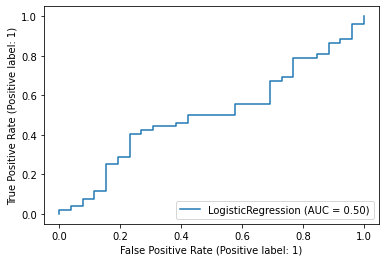

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rfc_disp = plot_roc_curve(lgclf, X_test, y_test)
plt.show()

In [26]:
lgclf = LogisticRegression(random_state=42, fit_intercept = True, penalty ="l2").fit(X_train1, y_train1) 

In [27]:
print(cross_val_score(lgclf, X_train1, y_train1, cv=10))

[0.40425532 0.5        0.5        0.5        0.47311828 0.49462366
 0.49462366 0.50537634 0.52688172 0.50537634]


In [28]:
print("Accuracy Score:",lgclf.score(X_test, y_test))

Accuracy Score: 0.3333333333333333


In [29]:
lgclf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lgclf.predict(X_test))

array([[26,  0],
       [52,  0]])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


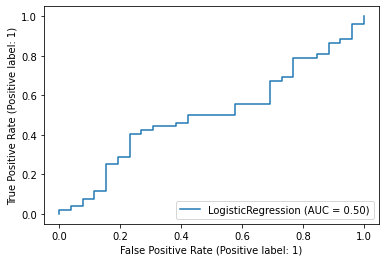

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

rfc_disp = plot_roc_curve(lgclf, X_test, y_test)
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
X_data = df_300[df_300.columns[:-2]]
y_data = df_300['rating']
X_train, X_test, y_train, y_test = train_test_split(X_data,
                            y_data,
                            test_size=0.1,
                            random_state=42)

In [34]:
lrclf = LinearRegression(fit_intercept = True).fit(X_train, y_train)

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, lrclf.predict(X_test))

1768.4023656077147

In [36]:
import numpy as np
import scipy.stats
scipy.stats.pearsonr(lrclf.predict(X_test), y_test)

(0.13465967473856705, 0.23981726226016906)

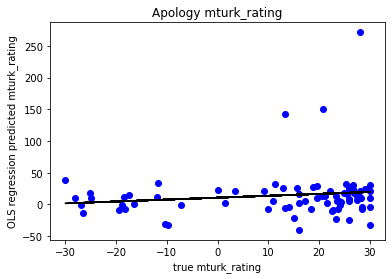

In [37]:
# Visualising the Test set results
theta = np.polyfit(y_test, lrclf.predict(X_test), 1)
y_line = theta[1] + theta[0] * y_test
plt.scatter(y_test, lrclf.predict(X_test), color = 'blue')
plt.plot(y_test, y_line, 'black')
plt.title('Apology mturk_rating')
plt.xlabel('true mturk_rating')
plt.ylabel('OLS regression predicted mturk_rating')
plt.show()

In [38]:
#the proportion of true and predicted ratings sharing same direction (both positive and both negative rate)
def match():
    no_match = 0
    true = []
    pre_binary = []
    for i in range(len(y_test)):
        if y_test.to_list()[i] * lrclf.predict(X_test)[i] < 0:
            no_match = no_match + 1
    for i in range(len(y_test)):
        if lrclf.predict(X_test)[i] <= 0:
            pre_binary.append(0)
        else:
            pre_binary.append(1)
    for i in range(len(y_test)):
        if y_test.to_list()[i] <= 0:
            true.append(0)
        else:
            true.append(1)
    accuracy = 1- (no_match/len(y_test))
    print(accuracy)
    return pre_binary, true

In [39]:
pre, true = match()

0.6794871794871795


In [40]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp  =  confusion_matrix(true, pre).ravel()
(tn, fp, fn, tp)

(8, 10, 16, 44)

In [43]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [48]:
rg1 = Ridge(alpha=0.01).fit(X_train, y_train)
rg1.predict(X_test)

array([ 6.81027931,  6.91082218,  7.36411979,  6.66061755,  7.22680251,
        9.46519116,  9.04397244,  7.46517996, 10.12393816,  6.95845833,
        9.583355  ,  6.58647185,  4.58889215,  4.38166884,  4.45343439,
        8.53188777,  7.39421923,  2.56484481, 10.30634608,  4.30894281,
        3.21139663,  9.99577098,  2.77192822,  7.52726563, -0.08257412,
        6.95360855,  4.97570674,  7.83548916,  8.47935485, -1.26701435,
        7.96846184,  3.34293287,  7.17362841,  7.05631298,  4.42628826,
       10.74771356,  4.69742721,  7.42449093, 10.19229313,  7.40759128,
       10.01661373,  4.42792721,  5.35265938,  6.55380288,  9.64390393,
        4.47406304, 10.1069719 ,  8.47797019,  2.86669195,  5.46485402,
        7.67188657,  5.81535896,  1.35543898,  6.33392571,  9.48096571,
       10.22972986,  9.4377658 ,  7.02444794,  4.67005696,  7.00298472,
       10.37196625, -0.89381735,  5.99553978, -1.09977261, -0.77872223,
        7.48059107, 10.12485598, 10.01189043,  7.43032744,  6.91

In [49]:
mean_squared_error(y_test, rg1.predict(X_test))

389.56404786486627

In [50]:
import numpy as np
import scipy.stats
scipy.stats.pearsonr(rg1.predict(X_test), y_test)

(-0.14516161586584056, 0.2047755064816854)

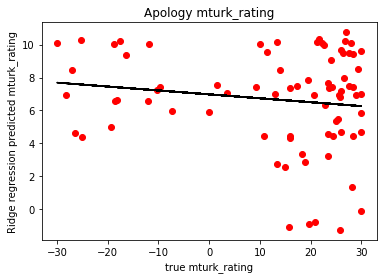

In [51]:
# Visualising the Test set results
theta = np.polyfit(y_test, rg1.predict(X_test), 1)
y_line = theta[1] + theta[0] * y_test
plt.scatter(y_test, rg1.predict(X_test), color = 'red')
plt.plot(y_test, y_line, 'black')
plt.title('Apology mturk_rating')
plt.xlabel('true mturk_rating')
plt.ylabel('Ridge regression predicted mturk_rating')
plt.show()

In [52]:
def match():
    no_match = 0
    true = []
    pre_binary = []
    for i in range(len(y_test)):
        if y_test.to_list()[i] * rg1.predict(X_test)[i] < 0:
            no_match = no_match + 1
    for i in range(len(y_test)):
        if rg1.predict(X_test)[i] <= 0:
            pre_binary.append(0)
        else:
            pre_binary.append(1)
    for i in range(len(y_test)):
        if y_test.to_list()[i] <= 0:
            true.append(0)
        else:
            true.append(1)
    accuracy = 1- (no_match/len(y_test))
    print(accuracy)
    return pre_binary, true

In [53]:
pre, true = match()

0.717948717948718


In [54]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp  =  confusion_matrix(true, pre).ravel()
(tn, fp, fn, tp)

(0, 18, 5, 55)

In [55]:
tpr = 1 - (fp/(tp+fp))
tpr

0.7534246575342466

In [56]:
tnr = 1 - (fn/(tn+fn))
tnr

0.0

In [57]:
lo1 = Lasso(alpha=0.00001).fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+05, tolerance: 2.940e+01
  model = cd_fast.enet_coordinate_descent(


In [58]:
mean_squared_error(y_test, lo1.predict(X_test))

422.4271125987101

In [59]:
import numpy as np
import scipy.stats
scipy.stats.pearsonr(lo1.predict(X_test), y_test)

(0.0817049124725122, 0.47699857084681807)

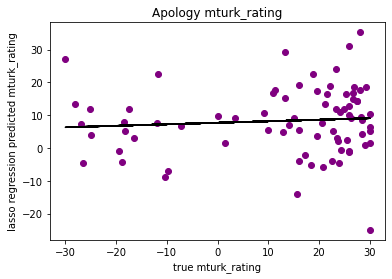

In [60]:
# Visualising the Test set results
theta = np.polyfit(y_test, lo1.predict(X_test), 1)
y_line = theta[1] + theta[0] * y_test
plt.scatter(y_test, lo1.predict(X_test), color = 'purple')
plt.plot(y_test, y_line, 'black')
plt.title('Apology mturk_rating')
plt.xlabel('true mturk_rating')
plt.ylabel('lasso regression predicted mturk_rating')
plt.show()

In [61]:
def match():
    no_match = 0
    true = []
    pre_binary = []
    for i in range(len(y_test)):
        if y_test.to_list()[i] * lo1.predict(X_test)[i] < 0:
            no_match = no_match + 1
    for i in range(len(y_test)):
        if lo1.predict(X_test)[i] <= 0:
            pre_binary.append(0)
        else:
            pre_binary.append(1)
    for i in range(len(y_test)):
        if y_test.to_list()[i] <= 0:
            true.append(0)
        else:
            true.append(1)
    accuracy = 1- (no_match/len(y_test))
    print(accuracy)
    return pre_binary, true

In [62]:
pre, true = match() # lower alpha, higher accuracy

0.7051282051282051


In [63]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp  =  confusion_matrix(true, pre).ravel()
(tn, fp, fn, tp)

(5, 13, 11, 49)

In [20]:
df_300.to_csv("Apology Existence word2vec features.csv")